In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import the data
spoofingData = pd.read_csv("spoofingSupervisedClassification.csv")
#spoofingData.drop('timestamp', axis=1, inplace=True)
spoofingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 9 columns):
data0    60000 non-null int64
data1    60000 non-null int64
data2    60000 non-null int64
data3    60000 non-null int64
data4    60000 non-null int64
data5    60000 non-null int64
data6    60000 non-null int64
data7    60000 non-null int64
flag     60000 non-null int64
dtypes: int64(9)
memory usage: 4.1 MB


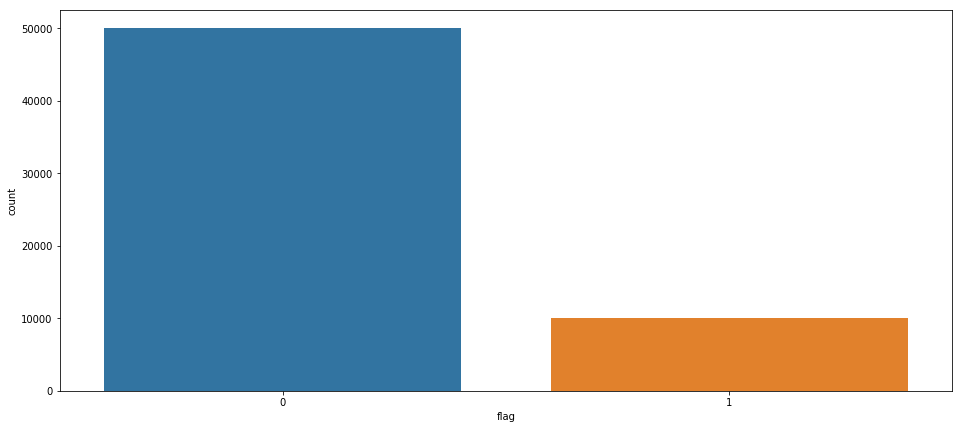

In [3]:
# class distribution
fig, ax = plt.subplots(figsize=(16, 7))
sns.countplot("flag",data=spoofingData)

In [4]:
#Create data = x
Cls_X = spoofingData.copy()

#create target = Y
Cls_y = Cls_X.flag

print('X shape before ')
print(Cls_X.shape)

#drop the response column from the x dataset
Cls_X.pop('flag') #drop 'flag'

print('X shape after ')
print(Cls_X.shape)
print('Y shape after ')
print(Cls_y.shape)

X shape before 
(60000, 9)
X shape after 
(60000, 8)
Y shape after 
(60000,)


In [5]:
def getRandomList(n):
    data = []
    for i in range(n):
        data.append(np.random.randint(0,255))
    return data

randomPayload = pd.DataFrame.from_dict({"data0":[], "data1": [], "data2": [], "data3": [],
                             "data4": [], "data5": [], "data6": [], "data7": []})
for i in range(8):
    col = "data" + str(i)
    randomPayload[col] = getRandomList(1000)

In [6]:
randomPayload.head()

,data0,data1,data2,data3,data4,data5,data6,data7
0,216,180,149,35,32,175,187,174
1,27,172,118,230,226,131,40,17
2,184,54,70,13,43,170,145,197
3,81,204,233,13,128,242,186,23
4,123,143,77,34,140,162,153,63


In [7]:
randomPayload['flag'] = 1

In [8]:
# create X_new and y_new from random payload
X_new = randomPayload.iloc[:, 0:8]
y_new = randomPayload.flag

# get some goodpackets and badpackets
goodPackets = spoofingData.loc[spoofingData.flag == 0]
badPackets = spoofingData.loc[spoofingData.flag == 1]

# pick 1000 each of good packets and bad packets
small_badPackets = badPackets.iloc[:1000,]
small_goodPackets = goodPackets.iloc[:1000,]

In [9]:
# construct the dataframe with a mix of good packets, bad packets and random packets
X_new_good = small_goodPackets.iloc[:, 0:8]
y_new_good = small_goodPackets.flag

X_new_bad = small_badPackets.iloc[:, 0:8]
y_new_bad = small_badPackets.flag

X_full = pd.concat([X_new, X_new_good, X_new_bad], axis = 0)
y_full = pd.concat([y_new, y_new_good, y_new_bad], axis = 0)

In [10]:
print(X_full.shape)
print(y_full.shape)

(3000, 8)
(3000,)


In [11]:
X_full.to_pickle('X_full1.pickle')
y_full.to_pickle('y_full1.pickle')

## Read from pickeled data

In [98]:
X_nn = pd.read_pickle('X_full1.pickle')
y_nn = pd.read_pickle('y_full1.pickle')
                      

In [99]:
X_nn.head()

,data0,data1,data2,data3,data4,data5,data6,data7
0,216,180,149,35,32,175,187,174
1,27,172,118,230,226,131,40,17
2,184,54,70,13,43,170,145,197
3,81,204,233,13,128,242,186,23
4,123,143,77,34,140,162,153,63


In [93]:
y_nn.sum()

2000

In [100]:
X_nn.to_csv('NNX.csv', index=False)
y_nn.to_csv('NNy.csv', index=False)

In [89]:
y_nn.shape

(3000,)

### Training using cross-validation

Train the following models:

`Linear Models`:
- Logistic Regression
- SVC
- Linear Discriminant Analysis (LDA)

`Non-Linear Models`:
- Decision Tree
- KNN
- Naive Bayes

In [12]:
# Import classes
# model selection
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# linear classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# non-linear classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [13]:
df_X = Cls_X
df_y = Cls_y

In [14]:
%%time
# prepare models
models = []
models.append(("LogReg", LogisticRegression()))
models.append(("LogReg_C2", LogisticRegression(C=2)))
models.append(("LogReg_C10", LogisticRegression(C=10)))
models.append(("SVM", SVC()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))


# declare results
results = []

# declare names to hold model names
names = []

scoring='roc_auc'

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=4)
    cv_results = cross_val_score(model, df_X, df_y, cv=kfold, scoring=scoring)
    results.append(cv_results) 
    names.append(name) 
    print("%s: %f" %(name, cv_results.mean()))

LogReg: 1.000000
LogReg_C2: 1.000000
LogReg_C10: 1.000000
SVM: 1.000000
LDA: 0.999800
KNN: 1.000000
CART: 1.000000
NB: 1.000000
CPU times: user 38.1 s, sys: 1.27 s, total: 39.3 s
Wall time: 39.2 s


In [15]:
df_X = X_full
df_y = y_full

In [16]:
%%time
# prepare models
models = []
models.append(("LogReg", LogisticRegression()))
models.append(("LogReg_C2", LogisticRegression(C=2)))
models.append(("LogReg_C10", LogisticRegression(C=10)))
models.append(("SVM", SVC()))
models.append(("LDA", LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))


# declare results
results = []

# declare names to hold model names
names = []

scoring='roc_auc'

for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=4)
    cv_results = cross_val_score(model, df_X, df_y, cv=kfold, scoring=scoring)
    results.append(cv_results) 
    names.append(name) 
    print("%s: %f" %(name, cv_results.mean()))

LogReg: 0.967591
LogReg_C2: 0.968266
LogReg_C10: 0.966012
SVM: 0.986464
LDA: 0.961521
KNN: 0.998158
CART: 0.995043
NB: 0.943167
CPU times: user 2.05 s, sys: 46.1 ms, total: 2.09 s
Wall time: 1.91 s


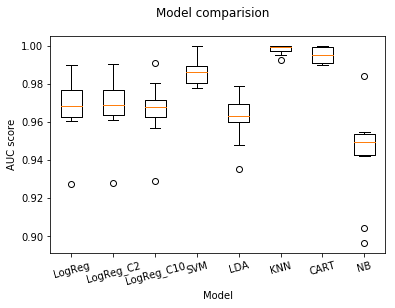

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure()
fig.suptitle('Model comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.xlabel("Model")
plt.ylabel("AUC score")
ax = ax.set_xticklabels(names, rotation='15')

## ROC Plotter

In [30]:
from sklearn.cross_validation import train_test_split
#Split data to  into train and holding set.
X_train,X_test,y_train,y_test = train_test_split(df_X, df_y, test_size = 0.3,
                                                 random_state = 1000)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2100, 8)
(2100,)
(900, 8)
(900,)


In [31]:
Classification_cv = StratifiedKFold(n_splits = 10, random_state = 1000)
Classification_cv

StratifiedKFold(n_splits=10, random_state=1000, shuffle=False)

In [32]:
print(__doc__)

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

# clf -> the model with best parameters
# classification_type -> KNN or RandomForest or LogisticRegression
# cv -> The same Classification_cv object that we used in the above section
# X -> X_train, the training data we used in the above section
# y -> y_train, the training labesl we used in the above section
def ROC_plotter(clf,classfication_type,cv = Classification_cv, X = X_train.values, y = y_train.values):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    i= 0

    f, ax = plt.subplots(figsize=(15, 8))
    for train, test in cv.split(X, y):       
        probas_ = clf.fit(X[train], y[train]).predict_proba(X[test])
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=2, alpha=0.5,
                 label='ROC fold %d (AUC = %0.2f)' % (i+1, roc_auc))

        i += 1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=3, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    #plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
     #                label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.005, 1.05])
    plt.ylim([-0.005, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for ' + classfication_type)
    plt.legend(loc="lower right")
    plt.show()

Automatically created module for IPython interactive environment


### KNN ROC plotter

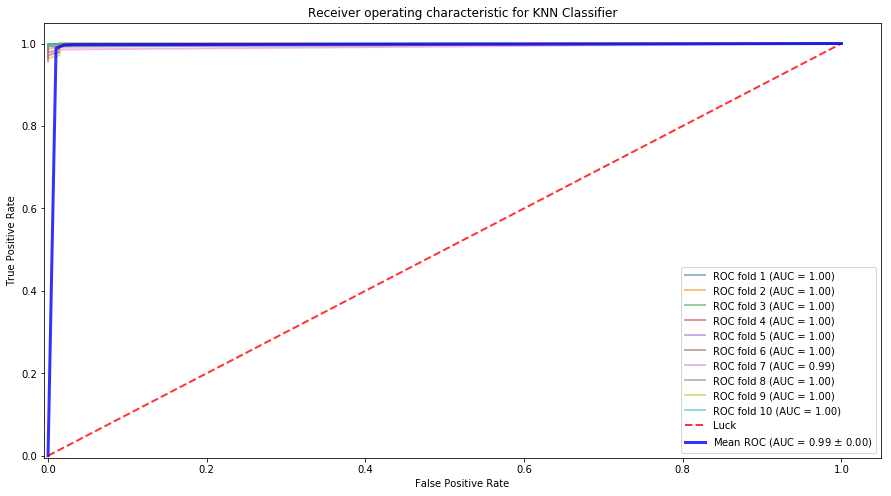

In [70]:
# Instantiate the model with best parameters found using GridSearchCV.
knn_clf = KNeighborsClassifier()

# Invoke ROC_plotter using the above model and the scaled Training data that was used for GridSearchCV.
ROC_plotter(knn_clf, 'KNN Classifier')

In [77]:
from sklearn.metrics import roc_auc_score

In [78]:
roc_auc_score(y_test, knn_clf.predict(X_test))

0.9916935144978288

In [71]:
gaussian_nb = GaussianNB()

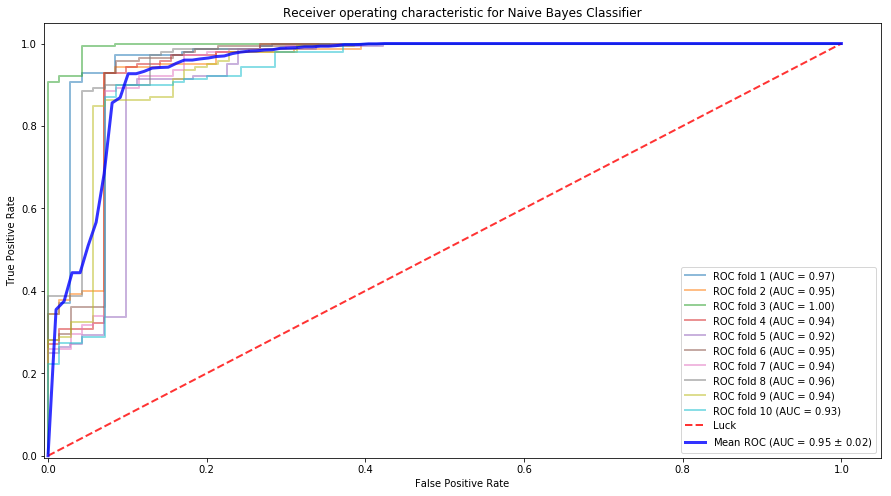

In [72]:
ROC_plotter(gaussian_nb, 'Naive Bayes Classifier')

In [79]:
roc_auc_score(y_test, gaussian_nb.predict(X_test))

0.890334780781622

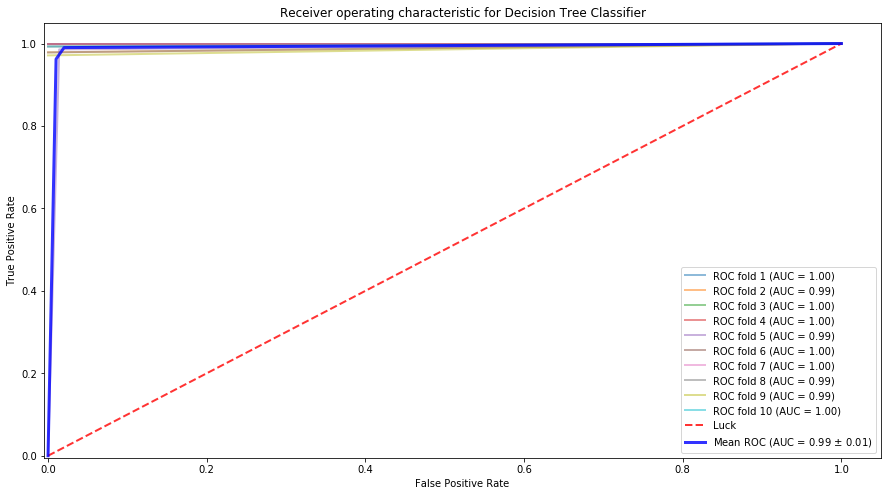

In [73]:
decision_tree_clf = DecisionTreeClassifier()
ROC_plotter(decision_tree_clf, 'Decision Tree Classifier')

In [80]:
roc_auc_score(y_test, decision_tree_clf.predict(X_test))

0.9933464070598123

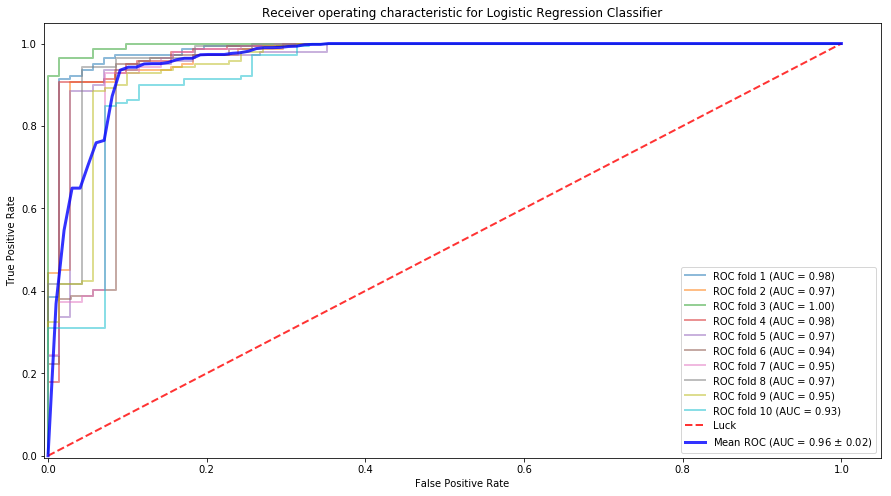

In [74]:
lr_clf = LogisticRegression(C=10)
ROC_plotter(lr_clf, 'Logistic Regression Classifier')

In [81]:
roc_auc_score(y_test, lr_clf.predict(X_test))

0.9073259560162488

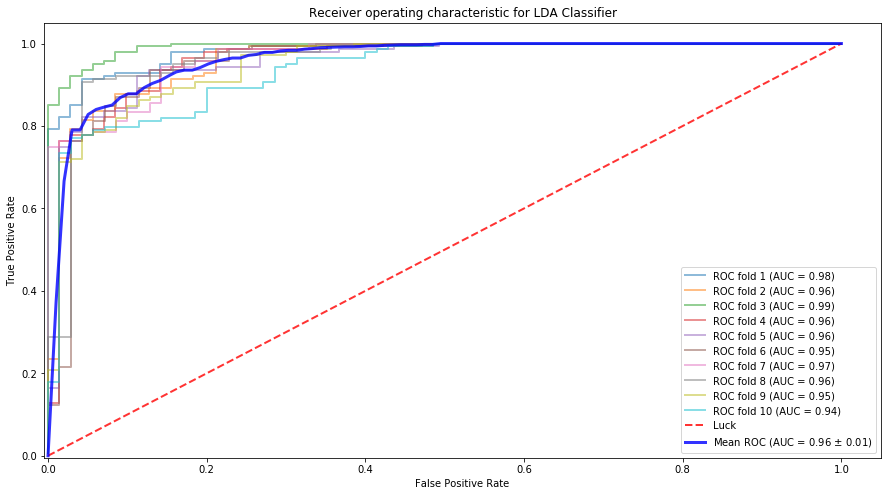

In [76]:
lda_clf = LinearDiscriminantAnalysis()
ROC_plotter(lda_clf, 'LDA Classifier')

In [82]:
roc_auc_score(y_test, lda_clf.predict(X_test))

0.875416725031517

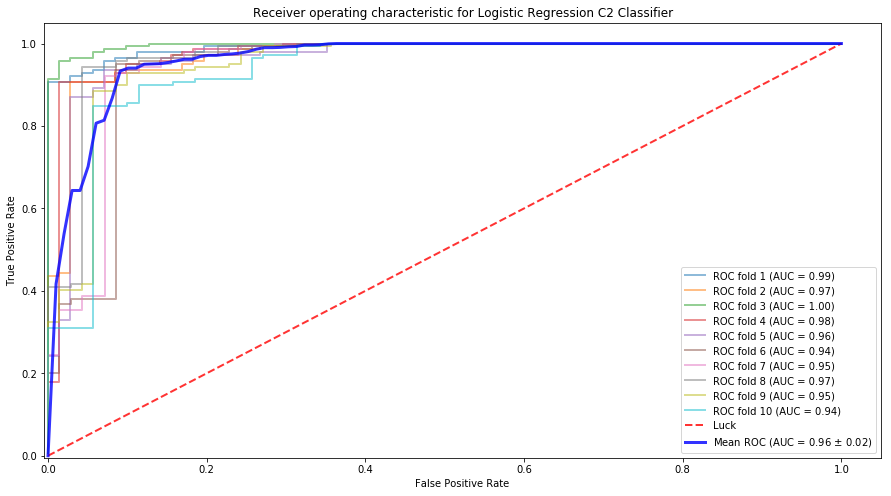

0.9056310407620114

In [85]:
lr_clf_c2 = LogisticRegression(C=2)
ROC_plotter(lr_clf_c2, "Logistic Regression C2 Classifier")
roc_auc_score(y_test, lr_clf_c2.predict(X_test))

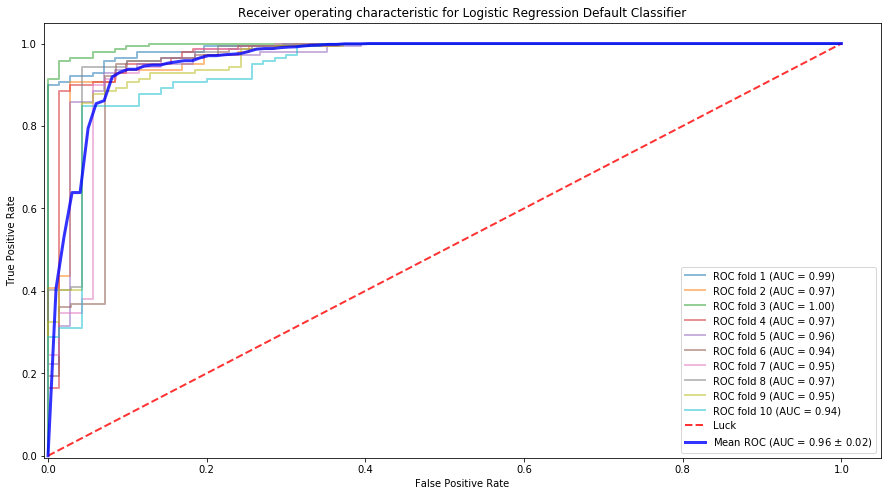

0.8988513797450624

In [86]:
lr_clf_c_default = LogisticRegression()
ROC_plotter(lr_clf_c_default, "Logistic Regression Default Classifier")
roc_auc_score(y_test, lr_clf_c_default.predict(X_test))